# Heart Disease Classification Challenge

## Overview

In this assignment, we will analyze the UCI Heart Disease Dataset, which contains medical records used to predict the presence of heart disease in patients. The dataset includes a mix of categorical and numerical variables, some missing values, and class imbalance.  

For the context of data science methods for heart disease prediction, refer to 
- Detrano, R., et., al. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304-310. DOI:[10.1016/0002-9149(89)90524-9](https://doi.org/10.1016/0002-9149(89)90524-9).

## Dataset Information 

The dataset is available at the UCI Machine Learning Repository:  
🔗 [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)  

- Key Features:  
    - The dataset includes 303 observations with 13 features.  
    - Features include age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, electrocardiographic results, and others.  
    - The response variable is `num`, which will be transformed to binary in the analysis.

## Objectives

Analyze the dataset using **two classification algorithms**. Your analysis should include exploratory data analysis, handling of missing values, feature selection, feature engineering, modeling, interpretation, and effective communication. The goal is to draw meaningful and well-supported conclusions from your analysis.

- Classifier requirement: **At least one** of the classifiers must be interpretable to allow for in-depth analysis and inference.

\newpage

# Q1  Define and describe a classification problem using the dataset.

In [17]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/static/public/45/data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**Answer**：The data machine contains 303 pieces of data and 14 variables, among which the first 13 are about the basic characteristics of the patient, including physiological features such as age and gender, as well as data about the condition, and num is the final diagnostic result. So, we chose num as the target field. Used to refer to whether the patient has heart disease. It is an integer value from 0 (non-existent) to 4. The experiments in the Cleveland database focused on simply trying to distinguish between existence (values 1, 2, 3, 4) and non existence (value 0).

\newpage

# Q2 Apply any chosen data transformations, or explain why no transformations were necessary.

**Answer**：The dataset consists entirely of numerical variables, without any string or object type variables, so there is no need for data type conversion. However, it is necessary to standardize the continuous variables, Standardization can improve the performance of gradient descent algorithms such as logistic regression.

\newpage

# Q3 Provide a detailed description of the dataset, including variables, summaries, number of observations, data types, and distributions (include at least three statements).

In [7]:
df.shape

(303, 14)

In [8]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

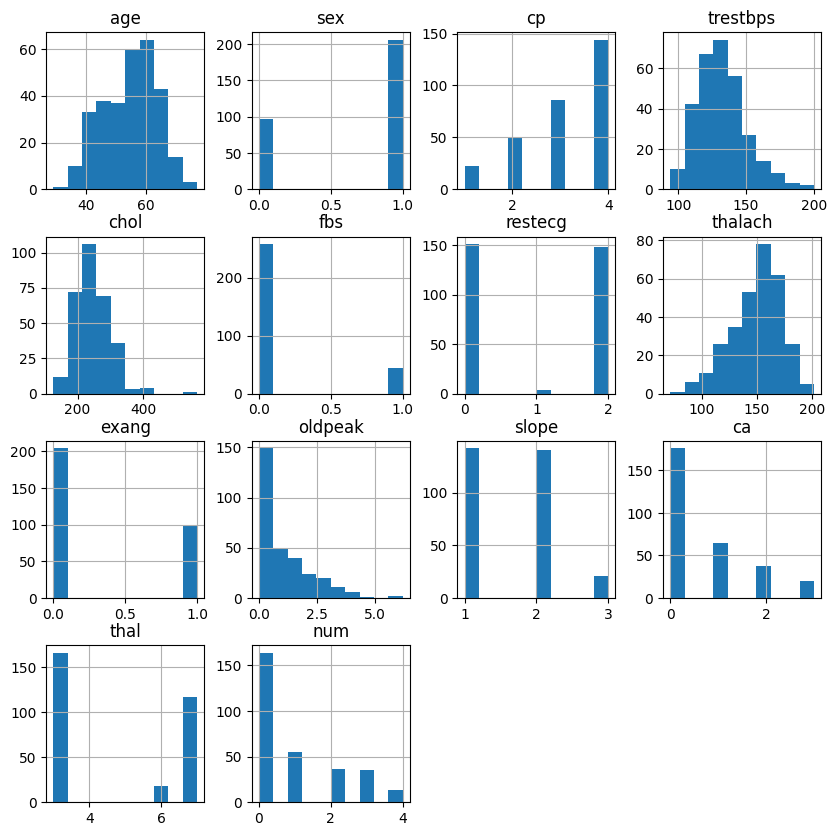

In [9]:
df.hist(figsize=(10,10))

**Answer**:
(1) there are 303 samples and 14 attributes.

(2) there are only int64 and float64 data type, They are all numerical variables.

(3) The variables of age, testbps, chol, and Thalach are relatively close to a normal distribution, while the number of categories in the target variable num is uneven.

\newpage

# Q4 Transform the response num into a binary outcome: 1 for heart disease and 0 for no heart disease. So combine 1, 2, 3, and 4 into 1 and 0 for 0. For Questions 4-16, use the transformed binary outcome.

In [10]:
def binary_process(data):
    
    if data<1:
        return 0
    else:
        return 1

df['num'] = df['num'].apply(binary_process)

\newpage

# Q5 5.Analyze relationships between variables and discuss their implications for feature selection or extraction (include at least two statements).

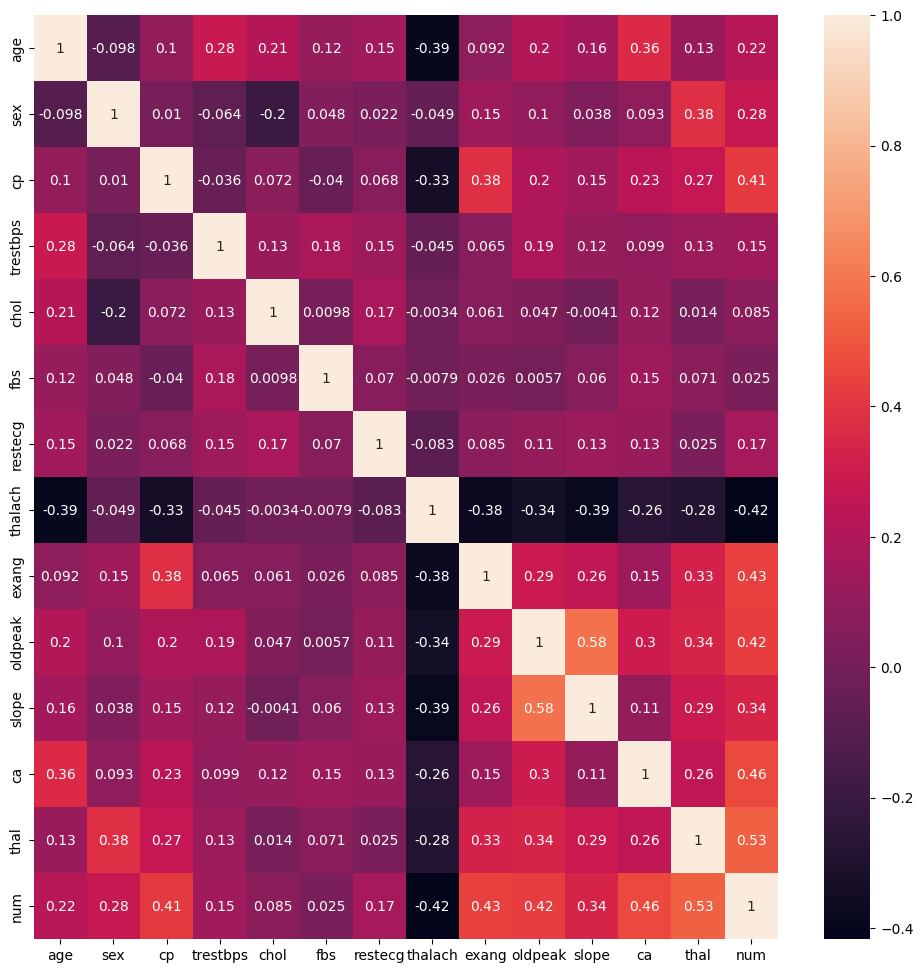

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

\newpage

# Q6 Drop the rows with the missing values. How many osbervations after dropping the missing values. Skip the outlier analysis.

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [13]:
df = df.dropna()

df.shape

(297, 14)

**Answer**:there are 6 rows with the missing values. and  there are 297 osbervations after dropping the missing values

\newpage

# Q7 Sub-group analysis: Explore potential sub-groups within the data using appropriate data science methods. Identify and visualize these sub-groups without using the labels and categorical variables. Categroical variables already define sub groups so we don’t need to include them for this analysis.

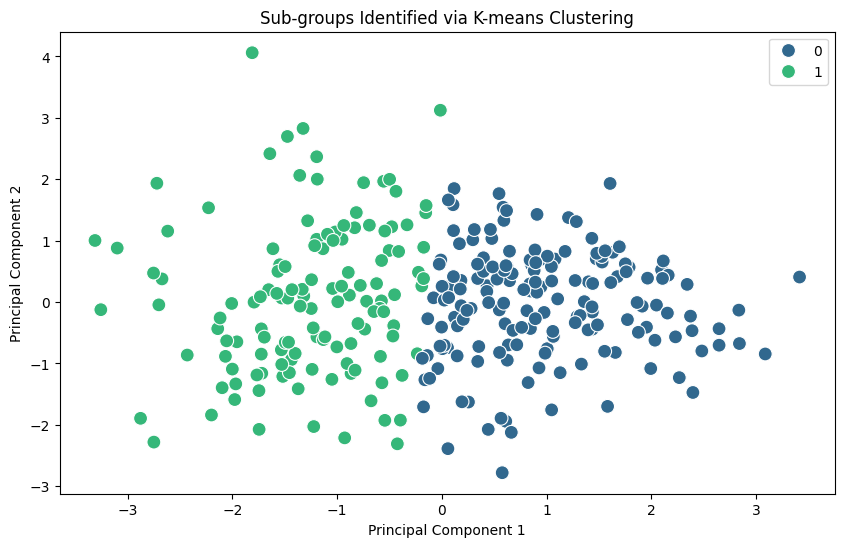

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cont_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_sub = df[cont_features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sub)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2,n_init='auto', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Plot PCA results with clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', s=100)
plt.title('Sub-groups Identified via K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Answer**: we using k-means clustering and pca to identify and visualize these sub-groups without using the labels and categorical variables.

\newpage

# Q8 Split 30% of the data for testing using a random seed of 1. Use the remaining 70% for training and model selection.

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(['num'],axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

\newpage

# Q9 Identify the two classifiers you have chosen. Justify your selections based on the classifier requirement for this assignment.

## Logistic regression

Logistic regression is a commonly used classification algorithm with high computational efficiency, fast training and prediction speed, and is suitable for processing large-scale datasets; The algorithm has low memory usage, and the model parameters only store feature weights and intercept terms. The model has strong interpretability; The output probability has clear statistical significance (probability values between 0-1)，The influence of features can be directly explained by weight coefficients (positive weights promote positive classes, negative weights suppress positive classes); The algorithm is based on maximum likelihood estimation and has a solid foundation in probability statistics to calculate confidence intervals and p-values for statistical testing. It performs well on linearly separable data.

## Random Forest

Random Forest is an ensemble learning algorithm that can handle complex nonlinear relationships; The algorithm automatically captures the interaction between features through the combination of multiple decision trees, without the need to manually construct feature cross terms. It has excellent anti overfitting ability; By using bagging (self sampling) and random subspace methods to reduce variance, parallel training is naturally supported, and performance can be improved by increasing the number of trees. The algorithm does not require features to follow a normal distribution, but instead quantifies feature contribution through permutation of importance to support feature selection and data understanding. It has strong robustness and is insensitive to missing values. It has a wide range of applicable scenarios and performs well on both small sample and large-scale data 

\newpage

# Q10 Specify two metrics to compare classifier performance. Provide technical details on how each metric is computed.

## Accuracy

Accuracy can directly reflect the proportion of correct predictions made by the model as a whole (correct sample size/total sample size), which non-technical personnel can quickly understand (such as "model accuracy of 90%"). When the distribution of categories is balanced (such as positive and negative samples 50:50), it can reliably reflect the high computational efficiency of the model performance, which is suitable for quickly evaluating the advantages of application scenarios in large datasets. It is suitable for scenarios where the cost of misjudgment is similar for various categories, and is the easiest to understand indicator for evaluating classification algorithms.

## F1 score

F1 score is the harmonic mean of precision and recall, which can cope with imbalanced categories;
When data is skewed (such as only 1% positive samples in fraud detection), misjudging cost sensitive scenarios is more reliable than accuracy

Precision: Focus on the proportion of samples predicted as positive that are actually positive (reducing false positives)

Recall: Focus on the proportion of samples that are actually positive and predicted to be positive (reduce false positives)

\newpage

# Q11 Train two selected classifiers in (9) and identify optimal tuning parameters (if applicable) using the training set.